# data loading

In [23]:
from visualizer import PredictionViz

from python_examples.data_loader import RegressionDataLoader
from python_examples.model import HeterosMLP
from python_examples.regression import Regression

In [24]:
import os
import pandas as pd

In [25]:
import numpy as np


# 코드에서 생성한 데이터
num_inputs = 1
num_samples = 100
num_test_samples = 10

# 디렉토리 생성 (이미 생성되어 있다면 생략)
if not os.path.exists("x_train_ex"):
    os.makedirs("x_train_ex")
if not os.path.exists("y_train_ex"):
    os.makedirs("y_train_ex")
if not os.path.exists("x_test_ex"):
    os.makedirs("x_test_ex")
if not os.path.exists("y_test_ex"):
    os.makedirs("y_test_ex")

# x_train과 y_train 폴더에 각각 10개의 파일 저장
for i in range(10):
    random_data = np.random.rand(num_samples, num_inputs)
    squared_data = random_data ** 2

    # Train 데이터를 CSV 파일로 저장 (x_train)
    df = pd.DataFrame(random_data, columns=[f'x_{i}' for i in range(num_inputs)])
    filename = f'x_train_data_{i}.csv'
    df.to_csv(os.path.join('x_train_ex', filename), index=False)

    # Train 데이터를 CSV 파일로 저장 (y_train, 제곱 값)
    df_squared = pd.DataFrame(squared_data, columns=['y'])
    filename_squared = f'y_train_data_{i}.csv'
    df_squared.to_csv(os.path.join('y_train_ex', filename_squared), index=False)

# x_test와 y_test에 한 개의 파일 저장
x_test_file = np.random.rand(num_test_samples, num_inputs)
y_test_file = x_test_file ** 2

# Test 데이터를 CSV 파일로 저장 (x_test)
test_df = pd.DataFrame(x_test_file, columns=[f'x_{i}' for i in range(num_inputs)])
test_filename = 'x_test_data.csv'
test_df.to_csv(os.path.join('x_test_ex', test_filename), index=False)

# Test 데이터를 CSV 파일로 저장 (y_test, 제곱 값)
test_df_squared = pd.DataFrame(y_test_file, columns=['y'])
test_filename_squared = 'y_test_data.csv'
test_df_squared.to_csv(os.path.join('y_test_ex', test_filename_squared), index=False)

In [26]:
num_inputs = 1
num_outputs = 1
num_epochs = 1

x_train_folder = "/Users/jaebeomlee/Documents/Codes/cuTAGI_backup230720/x_train_ex"
y_train_folder = "/Users/jaebeomlee/Documents/Codes/cuTAGI_backup230720/y_train_ex"
x_test_file = "/Users/jaebeomlee/Documents/Codes/cuTAGI_backup230720/x_test_ex"
y_test_file = "/Users/jaebeomlee/Documents/Codes/cuTAGI_backup230720/y_test_ex"

In [27]:
net_prop = HeterosMLP()

reg_data_loader = RegressionDataLoader(num_inputs=num_inputs,
                                        num_outputs=num_outputs,
                                        batch_size=net_prop.batch_size)

iter = 0

for file in os.listdir(x_train_folder):
    if file.endswith(".csv"):
        iter += 1
        x_train_path = os.path.join(x_train_folder, file)
        y_train_path = os.path.join(y_train_folder, file.replace("x_train", "y_train"))

        print("Now: " + x_train_path) 

        # Update the data_loader directly with x_train_path and y_train_path
        data_loader = reg_data_loader.process_data(x_train_path,
                                                   y_train_path,
                                                   x_test_file=x_train_path,  # Use x_train_path directly
                                                   y_test_file=y_train_path)  # Use y_train_path directly

        x_test_file = "/Users/jaebeomlee/Documents/Codes/cuTAGI_backup230720/x_test_ex"
        y_test_file = "/Users/jaebeomlee/Documents/Codes/cuTAGI_backup230720/y_test_ex"

        viz = PredictionViz(task_name="heteros_regression", data_name="toy1D")
        reg_task = Regression(num_epochs=num_epochs,
                              data_loader=data_loader,
                              net_prop=net_prop,
                              viz=viz)

Now: /Users/jaebeomlee/Documents/Codes/cuTAGI_backup230720/x_train_ex/x_train_data_8.csv
Now: /Users/jaebeomlee/Documents/Codes/cuTAGI_backup230720/x_train_ex/x_train_data_9.csv
Now: /Users/jaebeomlee/Documents/Codes/cuTAGI_backup230720/x_train_ex/x_train_data_4.csv
Now: /Users/jaebeomlee/Documents/Codes/cuTAGI_backup230720/x_train_ex/x_train_data_5.csv
Now: /Users/jaebeomlee/Documents/Codes/cuTAGI_backup230720/x_train_ex/x_train_data_7.csv
Now: /Users/jaebeomlee/Documents/Codes/cuTAGI_backup230720/x_train_ex/x_train_data_6.csv
Now: /Users/jaebeomlee/Documents/Codes/cuTAGI_backup230720/x_train_ex/x_train_data_2.csv
Now: /Users/jaebeomlee/Documents/Codes/cuTAGI_backup230720/x_train_ex/x_train_data_3.csv
Now: /Users/jaebeomlee/Documents/Codes/cuTAGI_backup230720/x_train_ex/x_train_data_11.csv
Now: /Users/jaebeomlee/Documents/Codes/cuTAGI_backup230720/x_train_ex/x_train_data_1.csv
Now: /Users/jaebeomlee/Documents/Codes/cuTAGI_backup230720/x_train_ex/x_train_data_0.csv
Now: /Users/jaebeoml

In [28]:
x_test_file = os.path.join("x_test_ex", os.listdir("x_test_ex")[0])
y_test_file = os.path.join("y_test_ex", os.listdir("y_test_ex")[0])

data_loader = reg_data_loader.process_data(x_train_path,
                                          y_train_path,
                                          x_test_file=x_test_file,
                                          y_test_file=y_test_file)


In [29]:
reg_task.train()

Epoch#  0|  100| 100	 mse:    0.08: 100%|██████████| 1/1 [00:00<00:00, 136.06it/s]


# model test 구축

In [30]:
import numpy as np
import matplotlib.pyplot as plt

from pytagi import NetProp, TagiNetwork
import cutagi as tagi

In [31]:
# Inputs, 오픈소스에서 가져온 부분
batch_size = net_prop.batch_size
Sx_batch, Sx_f_batch = reg_task.init_inputs(batch_size)

mean_predictions = []
variance_predictions = []
y_test = []
x_test = []
x_train = data_loader["train"][0].flatten()
y_train = data_loader["train"][1].flatten()

network = reg_task.network

for x_batch, y_batch in data_loader["test"]:
    # Predicitons
    network.feed_forward(x_batch, Sx_batch, Sx_f_batch)
    ma, Sa = network.get_network_predictions()

    mean_predictions.append(ma)
    variance_predictions.append(Sa + net_prop.sigma_v**2)
    x_test.append(x_batch)
    y_test.append(y_batch)

mean_predictions = np.stack(mean_predictions).flatten()
std_predictions = (np.stack(variance_predictions).flatten())**0.5
y_test = np.stack(y_test).flatten()
x_test = np.stack(x_test).flatten()

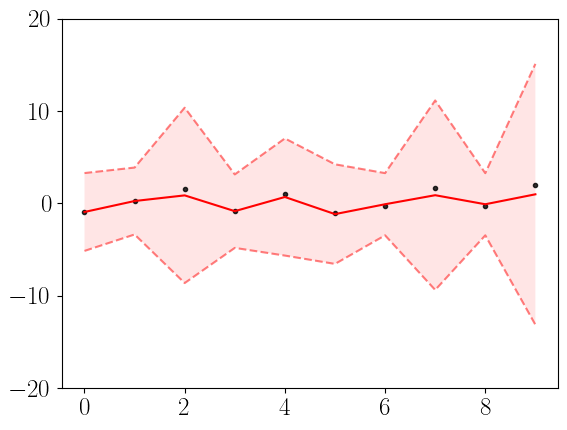

In [32]:
#x축을 time으로 두기 위해 새로 만든 코드

t_test = range(mean_predictions.shape[0])

# Plot figure
plt.figure()
ax = plt.axes()
std_factor = 1.64
ax.plot(t_test, y_test, "k.",alpha=0.8)
ax.plot(t_test, mean_predictions, "r-")
ax.plot(t_test, mean_predictions - std_factor * std_predictions.flatten(), "r--",alpha=0.5)
ax.plot(t_test, mean_predictions + std_factor * std_predictions.flatten(), "r--",alpha=0.5)

ax.fill_between(t_test,
                mean_predictions - std_factor * std_predictions.flatten(),
                mean_predictions + std_factor * std_predictions.flatten(),
                facecolor="red",
                alpha=0.1)

plt.ylim(-20, 20)
plt.show()

In [33]:
net_prop = HeterosMLP()

In [34]:
network = (net_prop)

In [35]:
network

In [36]:
#최종적으로 만들어낸 model test 코드

def model_test(reg_task):
    import numpy as np
    # Inputs
    batch_size = net_prop.batch_size
    Sx_batch, Sx_f_batch = reg_task.init_inputs(batch_size)

    mean_predictions = []
    variance_predictions = []
    y_test = []
    x_test = []
    x_train = data_loader["train"][0].flatten()
    y_train = data_loader["train"][1].flatten()

    network = reg_task.network

    for x_batch, y_batch in data_loader["test"]:
        # Predicitons
        network.feed_forward(x_batch, Sx_batch, Sx_f_batch)
        ma, Sa = network.get_network_predictions()

        mean_predictions.append(ma)
        variance_predictions.append(Sa + net_prop.sigma_v**2)
        x_test.append(x_batch)
        y_test.append(y_batch)

    mean_predictions = np.stack(mean_predictions).flatten()
    std_predictions = (np.stack(variance_predictions).flatten())**0.5
    y_test = np.stack(y_test).flatten()
    x_test = np.stack(x_test).flatten()

    import matplotlib.pyplot as plt

    t_test = range(mean_predictions.shape[0])

    std_factor = 1.64

    # Plot figure
    plt.figure()
    ax = plt.axes()
    ax.plot(t_test, y_test, "k.",alpha=0.8)
    ax.plot(t_test, mean_predictions, "r-")
    ax.plot(t_test, mean_predictions - std_factor * std_predictions.flatten(), "r--",alpha=0.5)
    ax.plot(t_test, mean_predictions + std_factor * std_predictions.flatten(), "r--",alpha=0.5)

    ax.fill_between(t_test,
                    mean_predictions - std_factor * std_predictions.flatten(),
                    mean_predictions + std_factor * std_predictions.flatten(),
                    facecolor="red",
                    alpha=0.1)

    plt.ylim(-20, 20)
    plt.show()

# 가중치 저장을 위한 model test

Now: /Users/jaebeomlee/Documents/Codes/cuTAGI_backup230720/x_train_ex/x_train_data_8.csv


Epoch#  0|  100| 100	 mse:    0.16: 100%|██████████| 1/1 [00:00<00:00, 121.91it/s]

model1


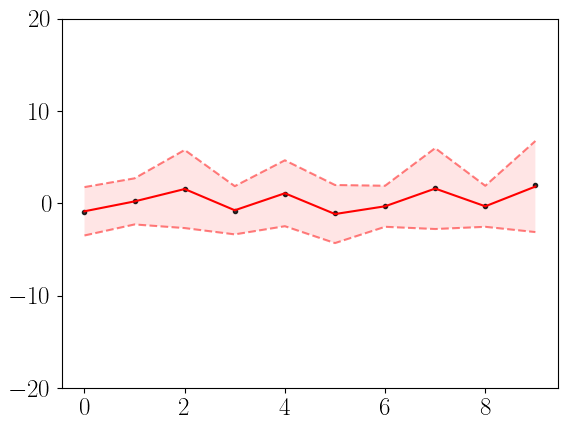

Now: /Users/jaebeomlee/Documents/Codes/cuTAGI_backup230720/x_train_ex/x_train_data_9.csv


Epoch#  0|  100| 100	 mse:    0.18: 100%|██████████| 1/1 [00:00<00:00, 125.20it/s]


model2


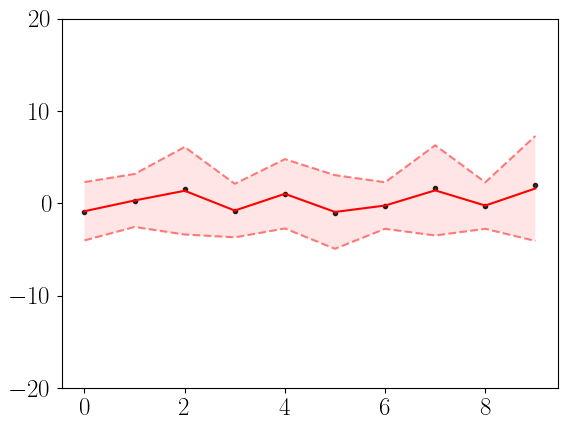

Now: /Users/jaebeomlee/Documents/Codes/cuTAGI_backup230720/x_train_ex/x_train_data_4.csv


Epoch#  0|  100| 100	 mse:    0.13: 100%|██████████| 1/1 [00:00<00:00, 126.63it/s]

model3


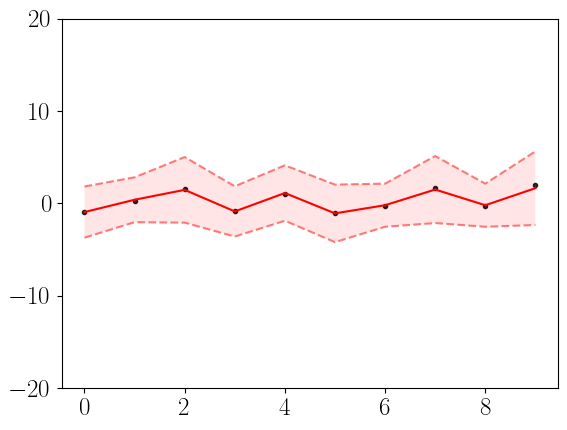

Now: /Users/jaebeomlee/Documents/Codes/cuTAGI_backup230720/x_train_ex/x_train_data_5.csv


Epoch#  0|  100| 100	 mse:    0.22: 100%|██████████| 1/1 [00:00<00:00, 129.27it/s]


model4


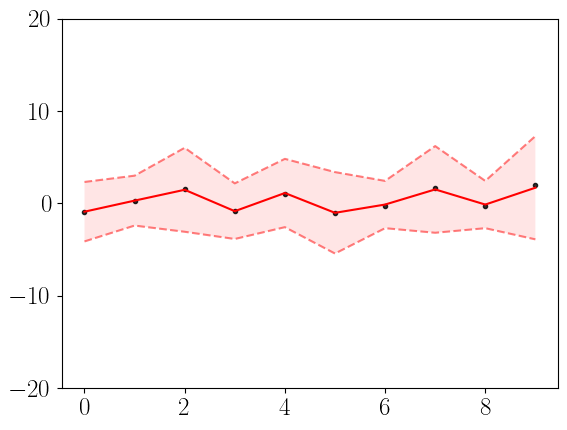

Now: /Users/jaebeomlee/Documents/Codes/cuTAGI_backup230720/x_train_ex/x_train_data_7.csv


Epoch#  0|  100| 100	 mse:    0.16: 100%|██████████| 1/1 [00:00<00:00, 155.55it/s]


model5


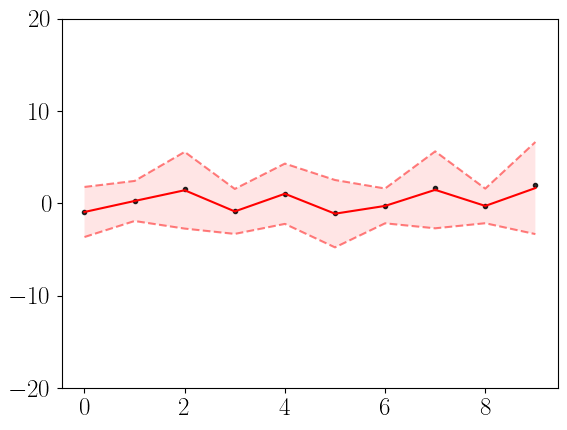

Now: /Users/jaebeomlee/Documents/Codes/cuTAGI_backup230720/x_train_ex/x_train_data_6.csv


Epoch#  0|  100| 100	 mse:    0.09: 100%|██████████| 1/1 [00:00<00:00, 141.62it/s]


model6


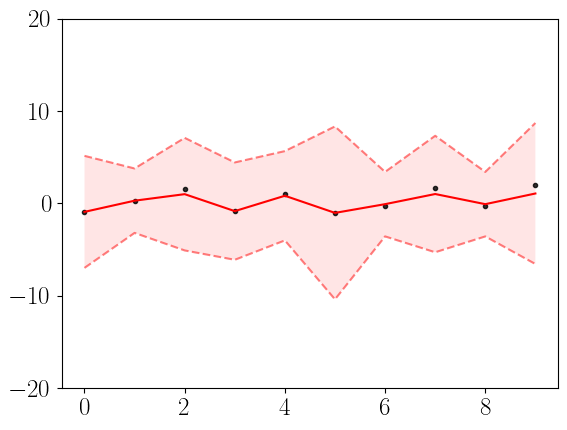

Now: /Users/jaebeomlee/Documents/Codes/cuTAGI_backup230720/x_train_ex/x_train_data_2.csv


Epoch#  0|  100| 100	 mse:    0.08: 100%|██████████| 1/1 [00:00<00:00, 125.36it/s]


model7


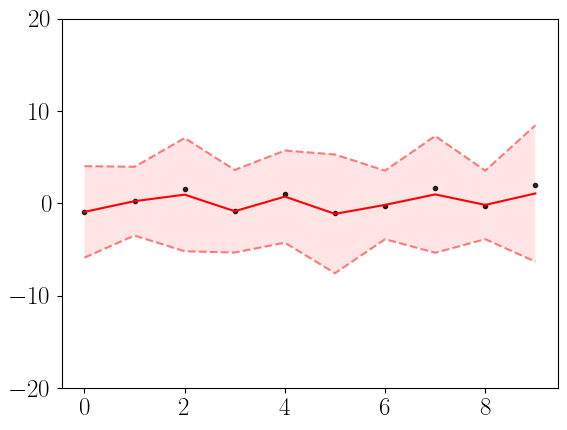

Now: /Users/jaebeomlee/Documents/Codes/cuTAGI_backup230720/x_train_ex/x_train_data_3.csv


Epoch#  0|  100| 100	 mse:    0.13: 100%|██████████| 1/1 [00:00<00:00, 136.98it/s]


model8


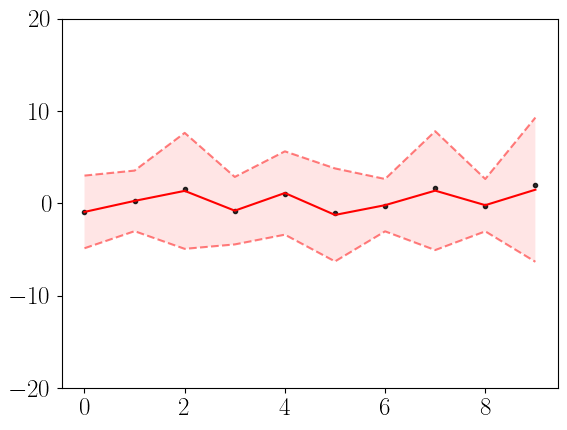

Now: /Users/jaebeomlee/Documents/Codes/cuTAGI_backup230720/x_train_ex/x_train_data_11.csv


Epoch#  0|  100| 100	 mse:    0.18: 100%|██████████| 1/1 [00:00<00:00, 130.89it/s]


model9


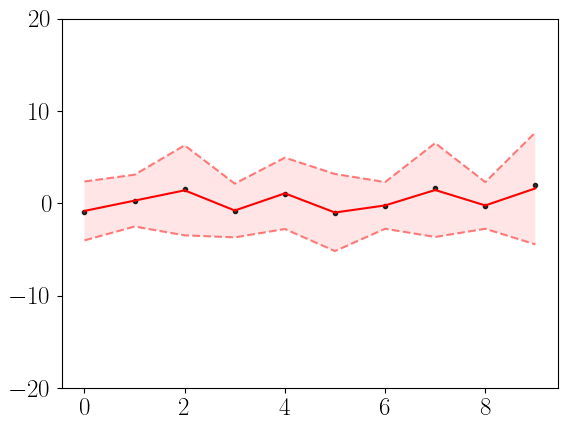

Now: /Users/jaebeomlee/Documents/Codes/cuTAGI_backup230720/x_train_ex/x_train_data_1.csv


Epoch#  0|  100| 100	 mse:    0.17: 100%|██████████| 1/1 [00:00<00:00, 122.58it/s]


model10


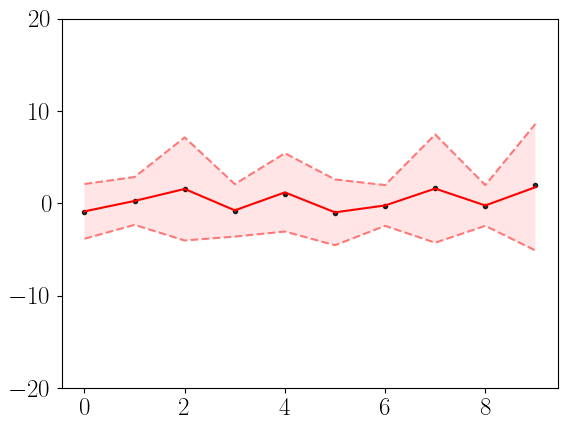

Now: /Users/jaebeomlee/Documents/Codes/cuTAGI_backup230720/x_train_ex/x_train_data_0.csv


Epoch#  0|  100| 100	 mse:    0.24: 100%|██████████| 1/1 [00:00<00:00, 121.64it/s]


model11


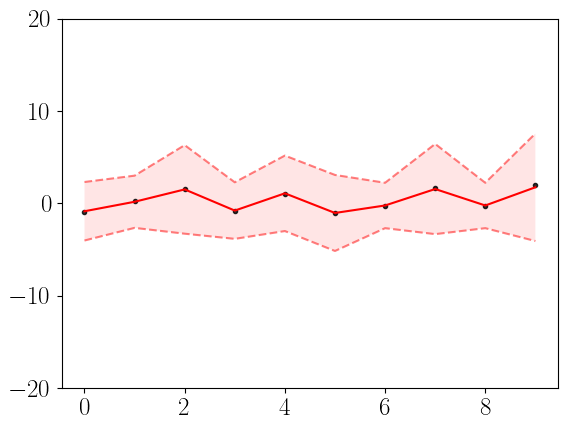

Now: /Users/jaebeomlee/Documents/Codes/cuTAGI_backup230720/x_train_ex/x_train_data_10.csv


Epoch#  0|  100| 100	 mse:    0.27: 100%|██████████| 1/1 [00:00<00:00, 130.79it/s]


model12


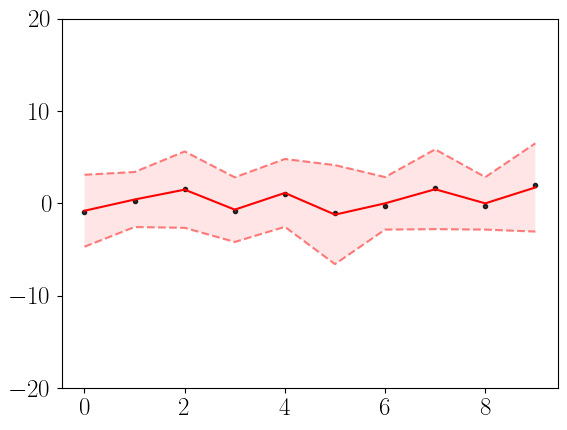

Now: /Users/jaebeomlee/Documents/Codes/cuTAGI_backup230720/x_train_ex/x_train_data_8.csv


Epoch#  0|  100| 100	 mse:    0.13: 100%|██████████| 1/1 [00:00<00:00, 128.90it/s]


model1


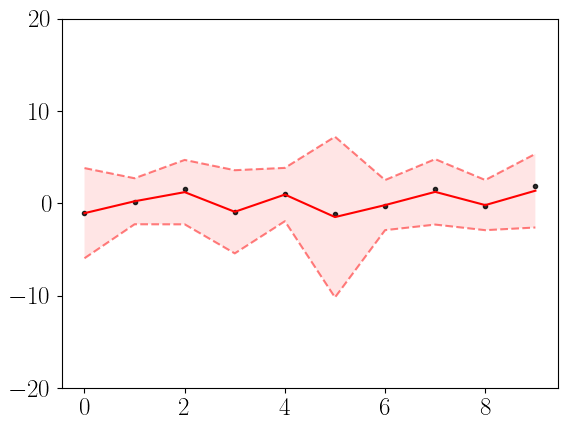

Now: /Users/jaebeomlee/Documents/Codes/cuTAGI_backup230720/x_train_ex/x_train_data_9.csv


Epoch#  0|  100| 100	 mse:    0.11: 100%|██████████| 1/1 [00:00<00:00, 130.72it/s]


model2


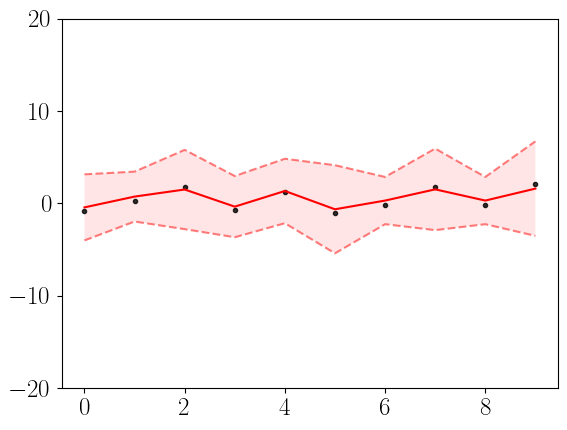

Now: /Users/jaebeomlee/Documents/Codes/cuTAGI_backup230720/x_train_ex/x_train_data_4.csv


Epoch#  0|  100| 100	 mse:    0.13: 100%|██████████| 1/1 [00:00<00:00, 120.44it/s]


model3


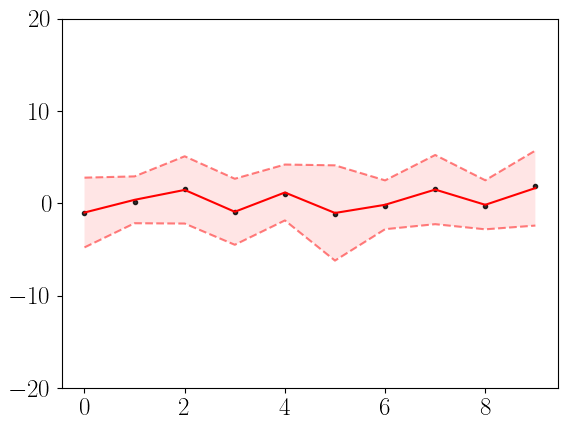

Now: /Users/jaebeomlee/Documents/Codes/cuTAGI_backup230720/x_train_ex/x_train_data_5.csv


Epoch#  0|  100| 100	 mse:    0.22: 100%|██████████| 1/1 [00:00<00:00, 130.74it/s]


model4


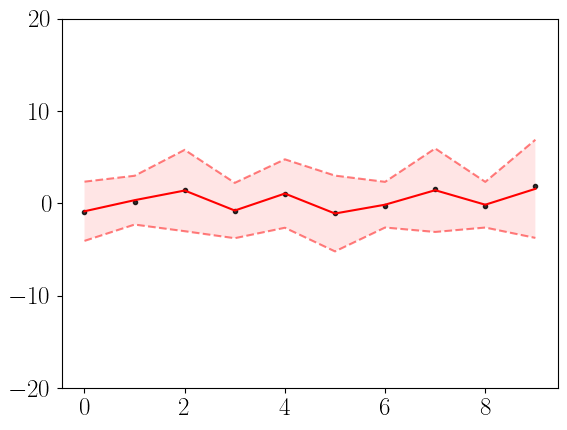

Now: /Users/jaebeomlee/Documents/Codes/cuTAGI_backup230720/x_train_ex/x_train_data_7.csv


Epoch#  0|  100| 100	 mse:    0.03: 100%|██████████| 1/1 [00:00<00:00, 130.29it/s]

model5


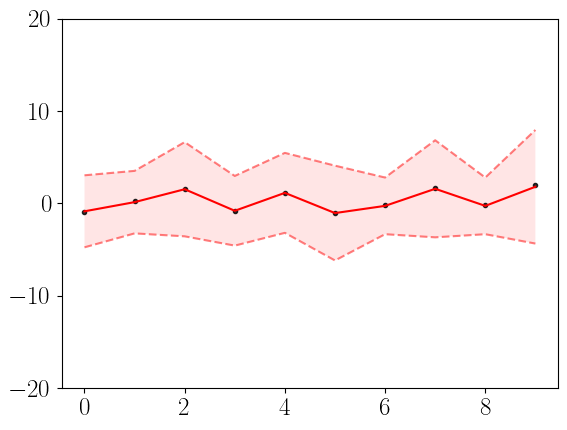

Now: /Users/jaebeomlee/Documents/Codes/cuTAGI_backup230720/x_train_ex/x_train_data_6.csv


Epoch#  0|  100| 100	 mse:    0.20: 100%|██████████| 1/1 [00:00<00:00, 122.91it/s]

model6


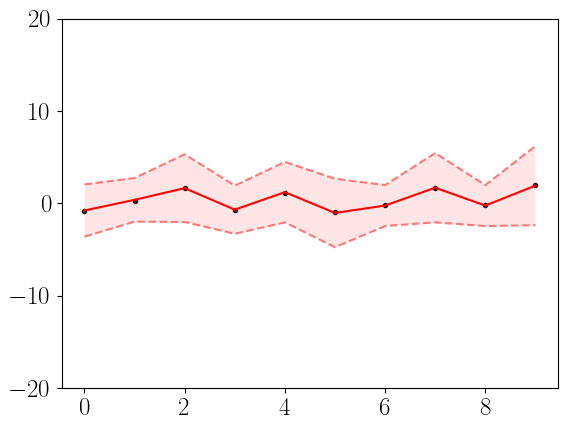

Now: /Users/jaebeomlee/Documents/Codes/cuTAGI_backup230720/x_train_ex/x_train_data_2.csv


Epoch#  0|  100| 100	 mse:    0.16: 100%|██████████| 1/1 [00:00<00:00, 80.26it/s]


model7


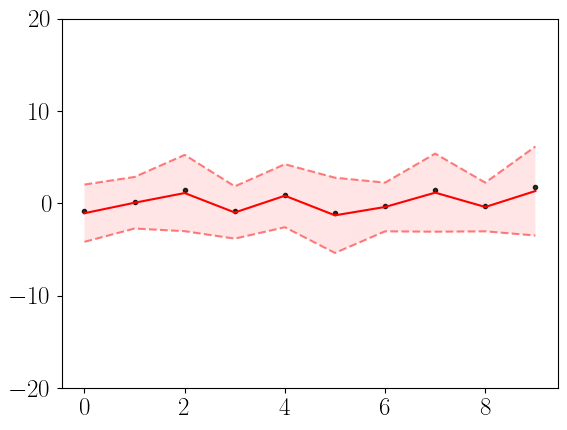

Now: /Users/jaebeomlee/Documents/Codes/cuTAGI_backup230720/x_train_ex/x_train_data_3.csv


Epoch#  0|  100| 100	 mse:    0.14: 100%|██████████| 1/1 [00:00<00:00, 138.79it/s]


model8


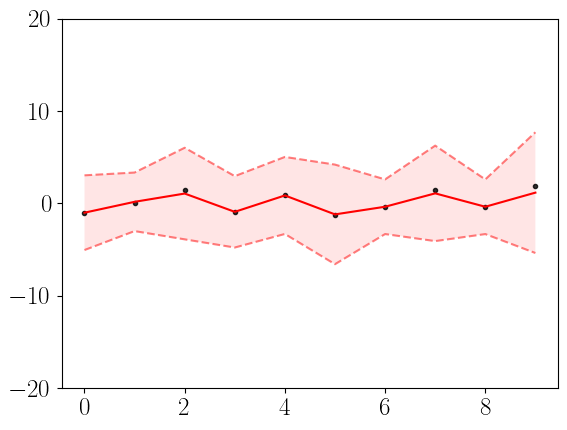

Now: /Users/jaebeomlee/Documents/Codes/cuTAGI_backup230720/x_train_ex/x_train_data_11.csv


Epoch#  0|  100| 100	 mse:    0.20: 100%|██████████| 1/1 [00:00<00:00, 133.56it/s]


model9


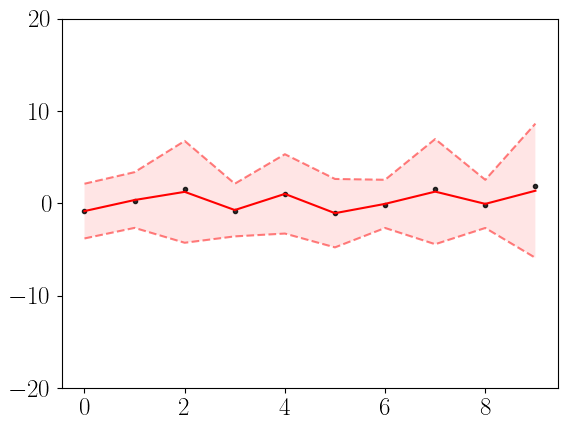

Now: /Users/jaebeomlee/Documents/Codes/cuTAGI_backup230720/x_train_ex/x_train_data_1.csv


Epoch#  0|  100| 100	 mse:    0.10: 100%|██████████| 1/1 [00:00<00:00, 127.05it/s]


model10


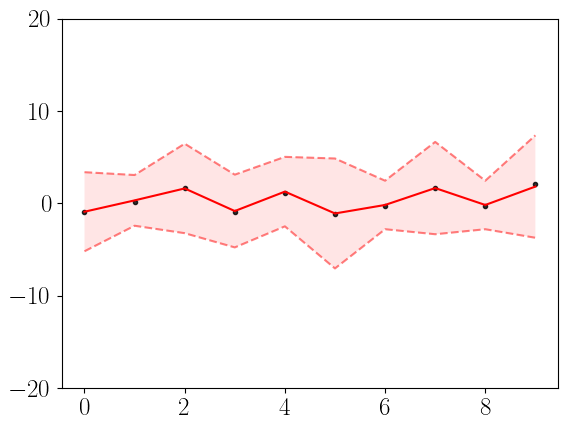

Now: /Users/jaebeomlee/Documents/Codes/cuTAGI_backup230720/x_train_ex/x_train_data_0.csv


Epoch#  0|  100| 100	 mse:    0.22: 100%|██████████| 1/1 [00:00<00:00, 136.46it/s]


model11


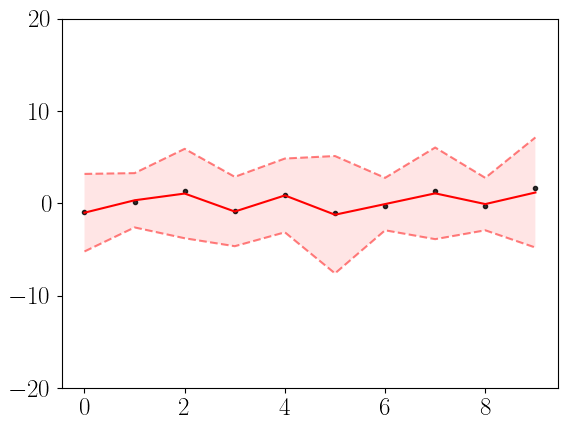

Now: /Users/jaebeomlee/Documents/Codes/cuTAGI_backup230720/x_train_ex/x_train_data_10.csv


Epoch#  0|  100| 100	 mse:    0.13: 100%|██████████| 1/1 [00:00<00:00, 137.88it/s]


model12


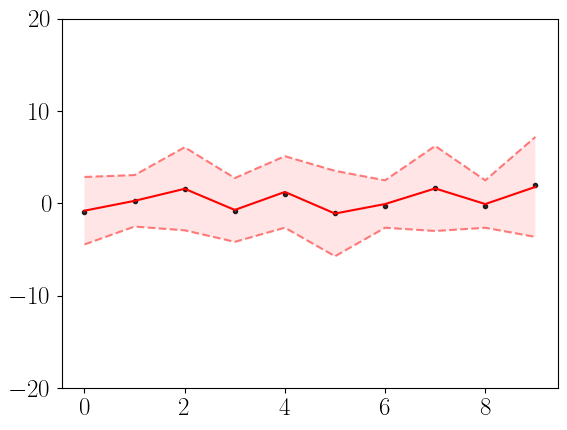

In [37]:
import numpy as np


class Param(tagi.Param):
    
    mw: np.ndarray
    Sw: np.ndarray
    mb: np.ndarray
    Sb: np.ndarray
    mw_sc: np.ndarray
    Sw_sc: np.ndarray
    mb_sc: np.ndarray
    Sb_sc: np.ndarray

    def __init__(self, mw: np.ndarray, Sw: np.ndarray, mb: np.ndarray,
                 Sb: np.ndarray, mw_sc: np.ndarray, Sw_sc: np.ndarray,
                 mb_sc: np.ndarray, Sb_sc: np.ndarray) -> None:
        super().__init__()
        self.mw = mw
        self.Sw = Sw
        self.mb = mb
        self.Sb = Sb
        self.mw_sc = mw_sc
        self.Sw_sc = Sw_sc
        self.mb_sc = mb_sc
        self.Sb_sc = Sb_sc
    

# 저장하는 코드
    def save_param(param, save_path):
        np.savez(save_path, mw=param.mw, Sw=param.Sw, mb=param.mb, Sb=param.Sb,
                mw_sc=param.mw_sc, Sw_sc=param.Sw_sc, mb_sc=param.mb_sc, Sb_sc=param.Sb_sc)

    # 훈련과 가중치 저장 부분
    reg_data_loader = RegressionDataLoader(num_inputs=num_inputs,
                                        num_outputs=num_outputs,
                                        batch_size=net_prop.batch_size)

    viz = PredictionViz(task_name="heteros_regression", data_name="toy1D")


    name = "model"
    iter = 0

    for file in os.listdir(x_train_folder):
        iter += 1
        if file.endswith(".csv"):
            x_train_path = os.path.join(x_train_folder, file)
            y_train_path = x_train_path.replace("x_train","y_train")

            print("Now: "+x_train_path)

            data_loader = reg_data_loader.process_data(x_train_path,
                                                y_train_path,
                                                x_test_file=x_test_file,
                                                y_test_file=y_test_file)
            
            reg_task = Regression(num_epochs=num_epochs,
                            data_loader=data_loader,
                            net_prop=net_prop,
                            viz=viz)
            
            reg_task.train()

            
            name_ = name + str(iter)
            print(name_)

            model_test(reg_task)

            reg_data_loader = RegressionDataLoader(num_inputs=num_inputs,
                                       num_outputs=num_outputs,
                                       batch_size=net_prop.batch_size)

viz = PredictionViz(task_name="heteros_regression", data_name="toy1D")

name = "model"
iter = 0

results_list = []  # 결과를 저장할 리스트

net_prop = HeterosMLP()  # 모델 초기화는 반복문 밖에서 한 번만 수행

for file in os.listdir(x_train_folder):
    if file.endswith(".csv"):
        iter += 1
        x_train_path = os.path.join(x_train_folder, file)
        y_train_path = x_train_path.replace("x_train", "y_train")

        print("Now: " + x_train_path)

        data_loader = reg_data_loader.process_data(x_train_path,
                                                   y_train_path,
                                                   x_test_file=x_test_file,
                                                   y_test_file=y_test_file)

        reg_task = Regression(num_epochs=num_epochs,
                              data_loader=data_loader,
                              net_prop=net_prop,
                              viz=viz)

        reg_task.train()

        name_ = name + str(iter)
        print(name_)

        model_test(reg_task)

        result = {}  
        result["mean_predictions"] = mean_predictions
        result["std_predictions"] = std_predictions
        result["y_test"] = y_test
        result["x_test"] = x_test  

        results_list.append(result)  # 결과를 리스트에 추가

        # 파일별로 결과 저장
        result_np = np.array(results_list)
        np.savez(f"model_train_result_{name_}.npz", data=result_np)



# 저장된 가중치값으로 reg_task.train을 대체하기

In [38]:
network = reg_task.network

In [39]:
param = network.get_parameters()

In [40]:
param.mb

[0.4900890290737152,
 0.937130868434906,
 -0.6223649382591248,
 -0.20194631814956665,
 -0.059496331959962845,
 -0.7925142049789429,
 -0.20546069741249084,
 -0.774603009223938,
 -0.9679476022720337,
 0.3644922077655792,
 -0.6794559955596924,
 -0.7339540123939514,
 -1.0780824422836304,
 0.6272374391555786,
 -0.4565313458442688,
 1.0543744564056396,
 -0.043920572847127914,
 -0.7615359425544739,
 0.1046094223856926,
 1.1138628721237183,
 -2.1003916263580322,
 0.9501805305480957,
 -0.4885026216506958,
 0.1359119415283203,
 0.08198536932468414,
 0.8395074605941772,
 0.8532411456108093,
 1.7059321403503418,
 -1.0429149866104126,
 1.5828971862792969,
 1.3433189392089844,
 -0.6755121946334839,
 -0.728123128414154,
 -0.5743056535720825,
 -0.07285351306200027,
 -0.6968293190002441,
 -1.09098482131958,
 -0.027969155460596085,
 -2.2661843299865723,
 -0.42379000782966614,
 0.7988695502281189,
 0.38873884081840515,
 -0.29163384437561035,
 -0.2291218787431717,
 0.7762998342514038,
 -0.4989513158798218

In [41]:
network.get_parameters()

Now: /Users/jaebeomlee/Documents/Codes/cuTAGI_backup230720/x_train_ex/x_train_data_8.csv
model1


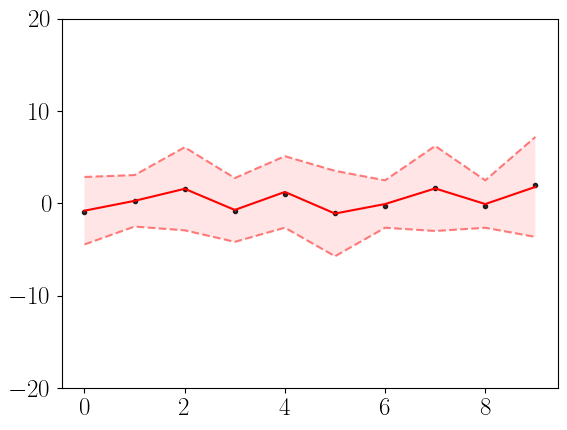

Now: /Users/jaebeomlee/Documents/Codes/cuTAGI_backup230720/x_train_ex/x_train_data_9.csv
model2


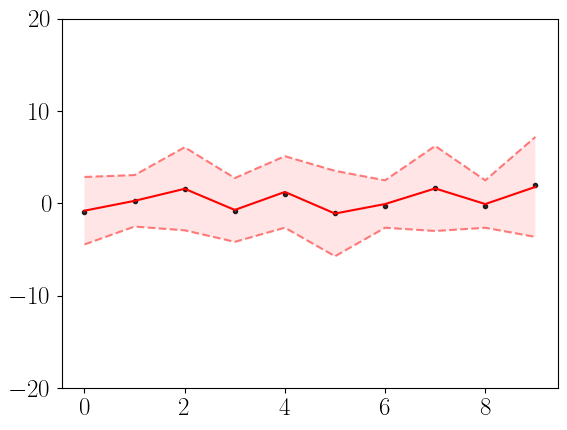

Now: /Users/jaebeomlee/Documents/Codes/cuTAGI_backup230720/x_train_ex/x_train_data_4.csv
model3


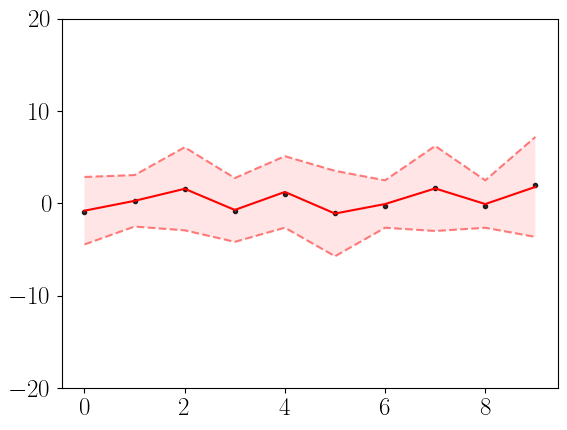

Now: /Users/jaebeomlee/Documents/Codes/cuTAGI_backup230720/x_train_ex/x_train_data_5.csv
model4


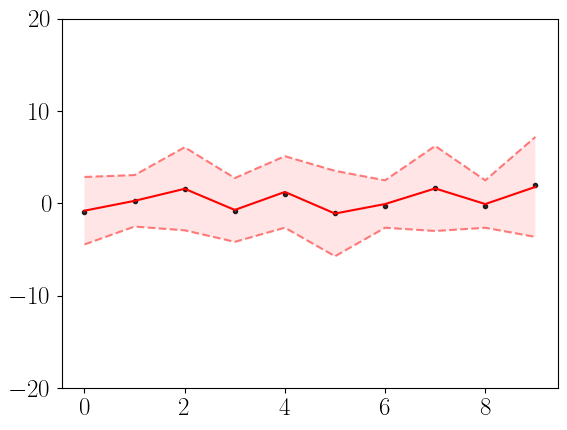

Now: /Users/jaebeomlee/Documents/Codes/cuTAGI_backup230720/x_train_ex/x_train_data_7.csv
model5


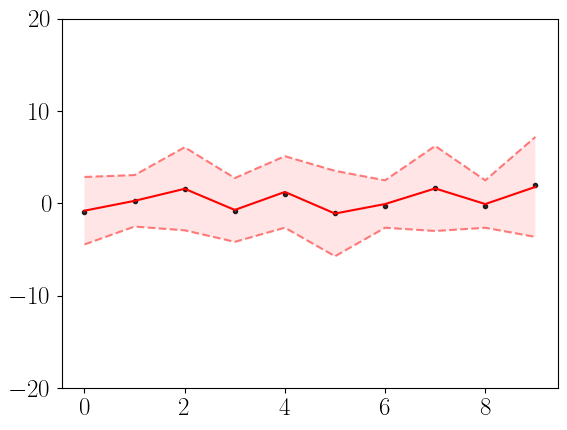

Now: /Users/jaebeomlee/Documents/Codes/cuTAGI_backup230720/x_train_ex/x_train_data_6.csv
model6


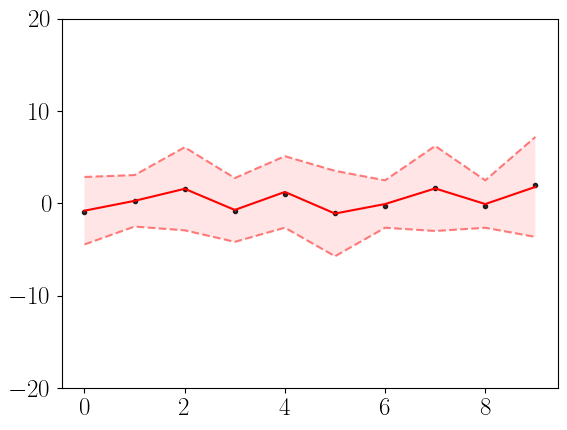

Now: /Users/jaebeomlee/Documents/Codes/cuTAGI_backup230720/x_train_ex/x_train_data_2.csv
model7


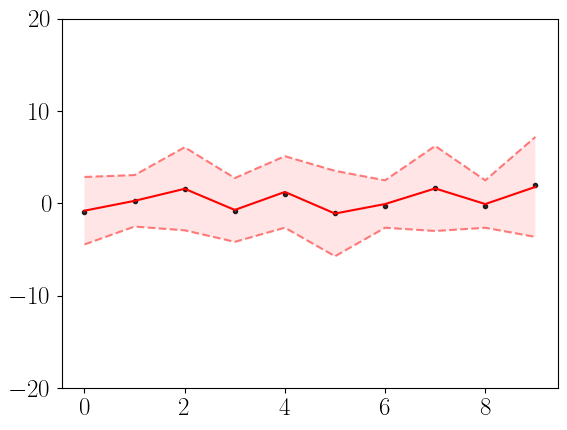

Now: /Users/jaebeomlee/Documents/Codes/cuTAGI_backup230720/x_train_ex/x_train_data_3.csv
model8


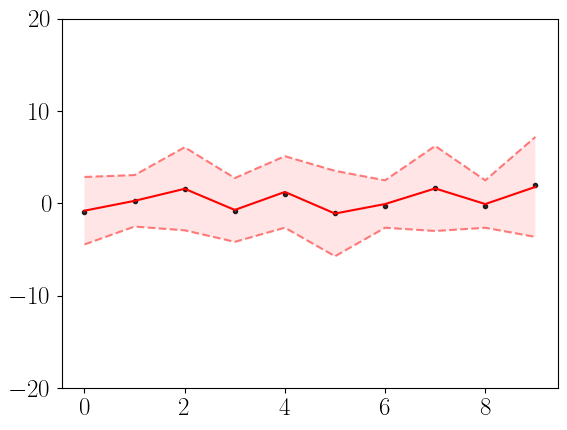

Now: /Users/jaebeomlee/Documents/Codes/cuTAGI_backup230720/x_train_ex/x_train_data_11.csv
model9


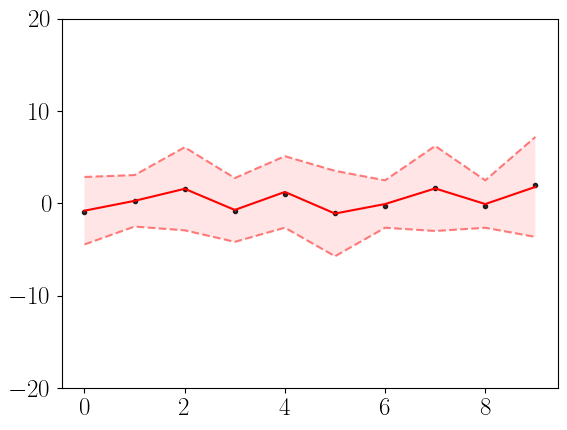

Now: /Users/jaebeomlee/Documents/Codes/cuTAGI_backup230720/x_train_ex/x_train_data_1.csv
model10


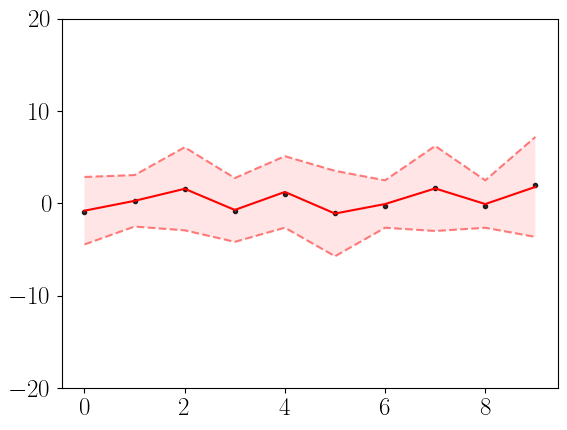

Now: /Users/jaebeomlee/Documents/Codes/cuTAGI_backup230720/x_train_ex/x_train_data_0.csv
model11


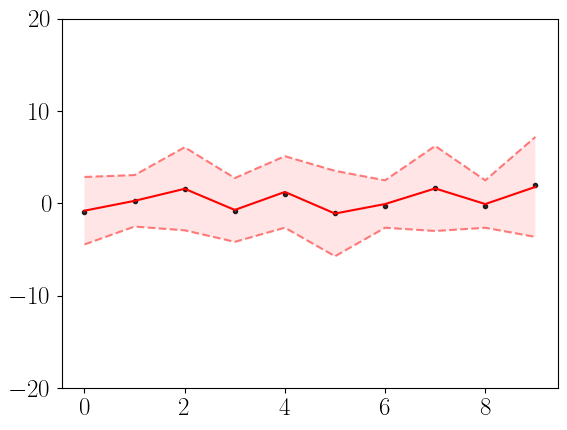

Now: /Users/jaebeomlee/Documents/Codes/cuTAGI_backup230720/x_train_ex/x_train_data_10.csv
model12


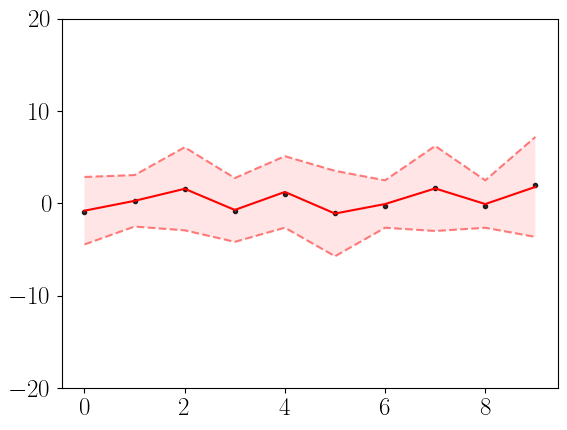

In [42]:
# 이 코드 plot된 결과를 보면 계속 같은 값이 반복되어 저장되는 듯한 형태로 보임

import numpy as np


class Param(tagi.Param):
    
    mw: np.ndarray
    Sw: np.ndarray
    mb: np.ndarray
    Sb: np.ndarray
    mw_sc: np.ndarray
    Sw_sc: np.ndarray
    mb_sc: np.ndarray
    Sb_sc: np.ndarray

    def __init__(self, mw: np.ndarray, Sw: np.ndarray, mb: np.ndarray,
                 Sb: np.ndarray, mw_sc: np.ndarray, Sw_sc: np.ndarray,
                 mb_sc: np.ndarray, Sb_sc: np.ndarray) -> None:
        super().__init__()
        self.mw = mw
        self.Sw = Sw
        self.mb = mb
        self.Sb = Sb
        self.mw_sc = mw_sc
        self.Sw_sc = Sw_sc
        self.mb_sc = mb_sc
        self.Sb_sc = Sb_sc
    

# 저장하는 코드
    def save_param(param, save_path):
        np.savez(save_path, mw=param.mw, Sw=param.Sw, mb=param.mb, Sb=param.Sb,
                mw_sc=param.mw_sc, Sw_sc=param.Sw_sc, mb_sc=param.mb_sc, Sb_sc=param.Sb_sc)

    # 훈련과 가중치 저장 부분
    reg_data_loader = RegressionDataLoader(num_inputs=num_inputs,
                                        num_outputs=num_outputs,
                                        batch_size=net_prop.batch_size)

    viz = PredictionViz(task_name="heteros_regression", data_name="toy1D")

    name = "model"
    iter = 0

    net_prop = HeterosMLP()

    for file in os.listdir(x_train_folder):
        if file.endswith(".csv"):
            iter += 1
            x_train_path = os.path.join(x_train_folder, file)
            y_train_path = x_train_path.replace("x_train","y_train")

            print("Now: "+x_train_path)

            data_loader = reg_data_loader.process_data(x_train_path,
                                                y_train_path,
                                                x_test_file=x_test_file,
                                                y_test_file=y_test_file)
            
            reg_task = Regression(num_epochs=num_epochs,
                            data_loader=data_loader,
                            net_prop=net_prop,
                            viz=viz)
            
            reg_task.network.set_parameters(param)

            name_ = name + str(iter)
            print(name_)

            model_test(reg_task)

            # 결과 저장 부분을 반복문 내부로 이동
            result = {}  
            result["mean_predictions"] = mean_predictions
            result["std_predictions"] = std_predictions
            result["y_test"] = y_test
            result["x_test"] = x_test  

            result_np = np.array([result])

            # 각 파일별로 결과 저장
            np.savez(f"model_param_result_{name_}.npz", data=result_np)

# 결과 확인 및 비교를 위한 코드

In [43]:
import os
import numpy as np

num_files = 10

for i in range(1, num_files + 1):
    filename = f"model_param_result_model{i}.npz"  
    loaded_data = np.load(filename, allow_pickle=True)
    print(f"Loaded data from {filename}")
    
    data_array = loaded_data['data']
    print(data_array)
    print("=" * 20)

Loaded data from model_param_result_model1.npz
[{'mean_predictions': array([-0.9362279 ,  0.25002486,  0.86160785, -0.84648454,  0.6858128 ,
        -1.1665727 , -0.09794863,  0.88028026, -0.099296  ,  0.97770476],
       dtype=float32), 'std_predictions': array([2.5688198, 2.2081294, 5.7867527, 2.4242542, 3.8657424, 3.2865975,
        2.052977 , 6.2523446, 2.0525377, 8.608048 ], dtype=float32), 'y_test': array([-0.90158006,  0.20352125,  1.54730654, -0.82487341,  1.04557945,
        -1.07165145, -0.2342301 ,  1.61515601, -0.2354879 ,  1.95381092]), 'x_test': array([-0.8335441 ,  0.43193942,  1.34886212, -0.69815679,  1.04122186,
        -1.2385583 ,  0.03743975,  1.38819396,  0.03618475,  1.57768811])}                                                                                  ]
Loaded data from model_param_result_model2.npz
[{'mean_predictions': array([-0.9362279 ,  0.25002486,  0.86160785, -0.84648454,  0.6858128 ,
        -1.1665727 , -0.09794863,  0.88028026, -0.099296  ,  0.

In [44]:
import os
import numpy as np

num_files = 10

for i in range(1, num_files + 1):
    filename = f"model_train_result_model{i}.npz"  
    loaded_data = np.load(filename, allow_pickle=True)
    print(f"Loaded data from {filename}")
    
    data_array = loaded_data['data']
    print(data_array)
    print("=" * 20)


Loaded data from model_train_result_model1.npz
[{'mean_predictions': array([-0.9362279 ,  0.25002486,  0.86160785, -0.84648454,  0.6858128 ,
        -1.1665727 , -0.09794863,  0.88028026, -0.099296  ,  0.97770476],
       dtype=float32), 'std_predictions': array([2.5688198, 2.2081294, 5.7867527, 2.4242542, 3.8657424, 3.2865975,
        2.052977 , 6.2523446, 2.0525377, 8.608048 ], dtype=float32), 'y_test': array([-0.90158006,  0.20352125,  1.54730654, -0.82487341,  1.04557945,
        -1.07165145, -0.2342301 ,  1.61515601, -0.2354879 ,  1.95381092]), 'x_test': array([-0.8335441 ,  0.43193942,  1.34886212, -0.69815679,  1.04122186,
        -1.2385583 ,  0.03743975,  1.38819396,  0.03618475,  1.57768811])}                                                                                  ]
Loaded data from model_train_result_model2.npz
[{'mean_predictions': array([-0.9362279 ,  0.25002486,  0.86160785, -0.84648454,  0.6858128 ,
        -1.1665727 , -0.09794863,  0.88028026, -0.099296  ,  0.